# Modeling

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# model scoreing
from sklearn.metrics import accuracy_score

# knn
from sklearn.neighbors import KNeighborsClassifier

# decision tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
 
# random forest
from sklearn.ensemble import RandomForestClassifier

# Logistic regresion
from sklearn.linear_model import LogisticRegression

# support ve tor machine
from sklearn import svm

# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# handle warning
import warnings
warnings.filterwarnings("ignore")

# get utility folder
import sys
sys.path.append("./util_")
import _utility

**Get data**

In [20]:
train = pd.read_csv("./data/1-1_training_data.csv", index_col=0)
validate = pd.read_csv("./data/1-2_validation_data.csv", index_col=0)
test = pd.read_csv("./data/1-3_testing_data.csv", index_col=0)
train.head(3)

,year_added,monthe_added,vendor_project_Acronis,vendor_project_Adobe,vendor_project_Alcatel,vendor_project_Amcrest,vendor_project_Android,vendor_project_Apache,vendor_project_Apple,vendor_project_Arcadyan,...,product_category_Hardware,product_category_Microsoft Products,product_category_Networking,product_category_Operating Systems,product_category_Other,product_category_Security,product_category_Storage,product_category_Virtualization and Cloud,product_category_Web Servers and Middleware,known_ransomware_campaign_use
848,2022,11,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
677,2022,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93,2021,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Separete features from target**

In [21]:
# target
ytrain = train.known_ransomware_campaign_use.astype("int")
yval = validate.known_ransomware_campaign_use.astype("int")
ytest = test.known_ransomware_campaign_use.astype("int")

# features
xtrain = train[train.columns[train.columns != "known_ransomware_campaign_use"]]
xval = validate[validate.columns[validate.columns != "known_ransomware_campaign_use"]]
xtest = test[test.columns[test.columns != "known_ransomware_campaign_use"]]
(xtrain.shape, xval.shape, xtest.shape)

((659, 231), (220, 231), (220, 231))

**Set a baseline**

In [22]:
# generate a baseline using the mode of the target variable
train["baseline"] = int(ytrain.mode())
base_feature = train["baseline"]

# generate a baseline acuracy or the data
baseline_acc = accuracy_score(ytrain, base_feature)
print("Baseline accuracy:", baseline_acc)

Baseline accuracy: 0.7860394537177542


### 1. K-nearest neighber (KNN)

In [23]:
# k_neighbors is the maximun number of neighbors the model should look at for it's predictions
# in this case k_neighbors is 1% of the data given
k_neighbors = math.ceil(xtrain.shape[0] * 0.02) # length of the data * 2%

result_array = []
for k in range(1, k_neighbors + 1):
    # create a knn object
    # n_neighbors default is 5 if none is given
    # p=2 means that I am using the manhattan distance
    knn = KNeighborsClassifier(n_neighbors=k, weights="uniform", p=2)
    # fit the data to the knn obkect
    # only fit the model on the training dataset
    knn.fit(xtrain, ytrain)
    # use the knn obkect to train the data and get the training score
    train_score = knn.score(xtrain, ytrain)
    val_score = knn.score(xval, yval)
    
    result = {
        "k": k,
        "train_score": train_score,
        "validation_score": val_score,
        "baseline": baseline_acc,
        "score_diff": train_score - val_score,
        "train-baseline_diff": train_score - baseline_acc,
        "validate-baseline_diff": val_score - baseline_acc
    }
    result_array.append(result)
knn_df = pd.DataFrame(result_array)
knn_df

,k,train_score,validation_score,baseline,score_diff,train-baseline_diff,validate-baseline_diff
0,1,0.954476,0.713636,0.786039,0.240840,0.168437,-0.072403
1,2,0.854325,0.786364,0.786039,0.067961,0.068285,0.000324
2,3,0.857360,0.754545,0.786039,0.102814,0.071320,-0.031494
3,4,0.836115,0.822727,0.786039,0.013388,0.050076,0.036688
4,5,0.833080,0.759091,0.786039,0.073990,0.047041,-0.026949
5,6,0.817906,0.818182,0.786039,-0.000276,0.031866,0.032142
6,7,0.819423,0.800000,0.786039,0.019423,0.033384,0.013961
7,8,0.810319,0.827273,0.786039,-0.016954,0.024279,0.041233
8,9,0.814871,0.813636,0.786039,0.001235,0.028832,0.027597
9,10,0.811836,0.827273,0.786039,-0.015437,0.025797,0.041233


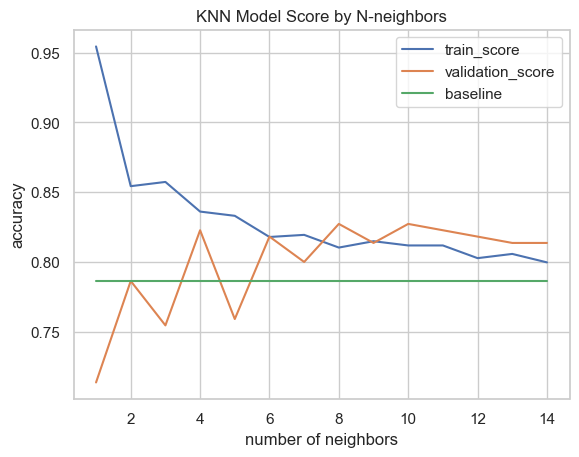

In [25]:
knn_df[knn_df.columns[:-3]].set_index("k").plot()
plt.grid(visible=True)
plt.xlabel("number of neighbors")
plt.ylabel("accuracy")
fig_title = plt.title("KNN Model Score by N-neighbors")
_utility.save_visuals(fig= plt.gcf() ,viz_name= fig_title.get_text().lower().replace(" ", "_"), folder_name= 5)
plt.show()

**Best KNN models**

In [26]:
res = knn_df[knn_df.k == 6]
res

,k,train_score,validation_score,baseline,score_diff,train-baseline_diff,validate-baseline_diff
5,6,0.817906,0.818182,0.786039,-0.000276,0.031866,0.032142


In [27]:
knn_df[knn_df.k == 9]

,k,train_score,validation_score,baseline,score_diff,train-baseline_diff,validate-baseline_diff
8,9,0.814871,0.813636,0.786039,0.001235,0.028832,0.027597


In [28]:
res.train_score - res.baseline

5    0.031866
dtype: float64

* K= 6 looks to be the best performing knn model
* Model accuracy is 0.031866 better than baseline

## 2. Decision Tree

In [29]:
# d: is the tree depth
max_depth = 14
result_array = []
for d in range(1, max_depth + 1):
    # create a decision tree object
    tree = DecisionTreeClassifier(max_depth=d, random_state=10)
    # fit the model
    tree.fit(xtrain,ytrain)
    # use the tree object to train the data and get the training score
    train_score = tree.score(xtrain, ytrain)
    val_score = tree.score(xval, yval)
    
    result = {
        "depth": d,
        "train_score": train_score,
        "validation_score": val_score,
        "baseline": baseline_acc,
        "score_diff": train_score - val_score,
        "train-baseline_diff": train_score - baseline_acc,
        "validate-baseline_diff": val_score - baseline_acc
    }
    result_array.append(result)
Tree_df = pd.DataFrame(result_array)
Tree_df

,depth,train_score,validation_score,baseline,score_diff,train-baseline_diff,validate-baseline_diff
0,1,0.792109,0.813636,0.786039,-0.021527,0.006070,0.027597
1,2,0.795144,0.827273,0.786039,-0.032129,0.009105,0.041233
2,3,0.796662,0.827273,0.786039,-0.030611,0.010622,0.041233
3,4,0.799697,0.827273,0.786039,-0.027576,0.013657,0.041233
4,5,0.807284,0.827273,0.786039,-0.019989,0.021244,0.041233
5,6,0.813354,0.822727,0.786039,-0.009374,0.027314,0.036688
6,7,0.820941,0.818182,0.786039,0.002759,0.034901,0.032142
7,8,0.828528,0.822727,0.786039,0.005801,0.042489,0.036688
8,9,0.836115,0.813636,0.786039,0.022479,0.050076,0.027597
9,10,0.843703,0.804545,0.786039,0.039157,0.057663,0.018506


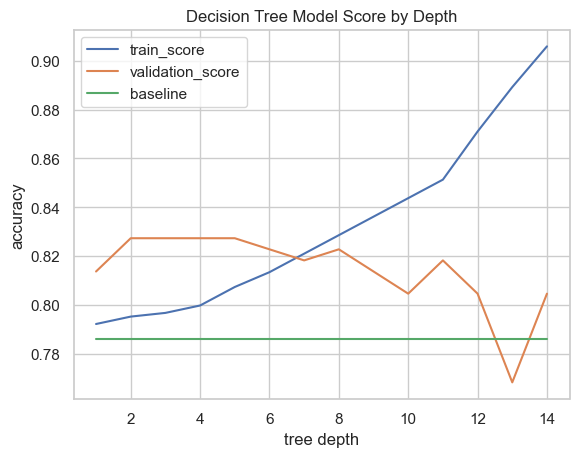

In [30]:
Tree_df[Tree_df.columns[:-3]].set_index("depth").plot()
plt.grid(visible=True)
plt.xlabel("tree depth")
plt.ylabel("accuracy")
fig_title = plt.title("Decision Tree Model Score by Depth")
_utility.save_visuals(fig= plt.gcf() ,viz_name= fig_title.get_text().lower().replace(" ", "_"), folder_name= 5)
plt.show()

**Best Decision Tree Model**

In [31]:
res = Tree_df[Tree_df.depth == 7]
res

,depth,train_score,validation_score,baseline,score_diff,train-baseline_diff,validate-baseline_diff
6,7,0.820941,0.818182,0.786039,0.002759,0.034901,0.032142


In [32]:
res.train_score - res.baseline

6    0.034901
dtype: float64

* depth= 7 looks to be the best performing decision tree model
* Model accuracy is  0.034901 better than baseline

## 3. Random Forest

In [33]:
# t: number of trees to create
max_trees = 200
result_array = []
for t in range(1, max_trees + 1):
    # create a random forest object
    forest = RandomForestClassifier(n_estimators= 1000,
                                   min_samples_leaf=t,
                                   max_depth=t,
                                   random_state=10)
    # fit the model
    forest.fit(xtrain,ytrain)
    # use the forest object to train the data and get the training score
    train_score = forest.score(xtrain, ytrain)
    val_score = forest.score(xval, yval)
    
    result = {
        "trees": t,
        "train_score": train_score,
        "validation_score": val_score,
        "baseline": baseline_acc,
        "score_diff": train_score - val_score,
        "train-baseline_diff": train_score - baseline_acc,
        "validate-baseline_diff": val_score - baseline_acc
    }
    result_array.append(result)
forest_df = pd.DataFrame(result_array)
forest_df.head(10)

,trees,train_score,validation_score,baseline,score_diff,train-baseline_diff,validate-baseline_diff
0,1,0.786039,0.831818,0.786039,-0.045779,0.0,0.045779
1,2,0.786039,0.831818,0.786039,-0.045779,0.0,0.045779
2,3,0.786039,0.831818,0.786039,-0.045779,0.0,0.045779
3,4,0.786039,0.831818,0.786039,-0.045779,0.0,0.045779
4,5,0.786039,0.831818,0.786039,-0.045779,0.0,0.045779
5,6,0.786039,0.831818,0.786039,-0.045779,0.0,0.045779
6,7,0.786039,0.831818,0.786039,-0.045779,0.0,0.045779
7,8,0.786039,0.831818,0.786039,-0.045779,0.0,0.045779
8,9,0.786039,0.831818,0.786039,-0.045779,0.0,0.045779
9,10,0.786039,0.831818,0.786039,-0.045779,0.0,0.045779


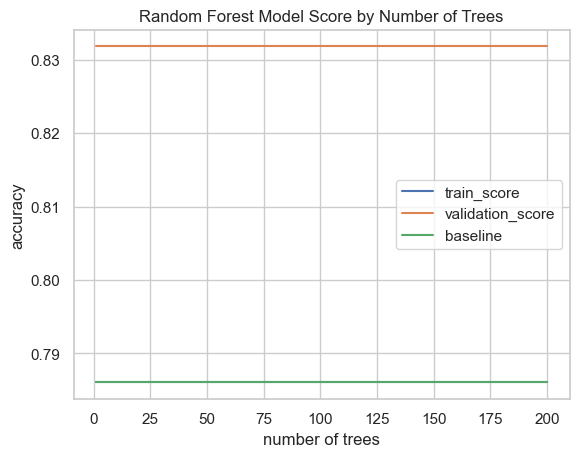

In [34]:
forest_df[forest_df.columns[:-3]].set_index("trees").plot()
plt.grid(visible=True)
plt.xlabel("number of trees")
plt.ylabel("accuracy")
fig_title = plt.title("Random Forest Model Score by Number of Trees")
_utility.save_visuals(fig= plt.gcf() ,viz_name= fig_title.get_text().lower().replace(" ", "_"), folder_name= 5)
plt.show()

**Best Random orest Model**
* All models Not able to beat baseline of 78% accuracy

## 4. Logistic Regression

In [35]:
# c is the  Inverse of regularization strength
max_iter = 1000
result_array = []
for strength in np.arange(0.00001, 1, .01):
    # create a logistic regression object
    logic = LogisticRegression(C=strength, max_iter= max_iter, random_state=10)
    # fit the model
    logic.fit(xtrain,ytrain)
    # use the logic object to train the data and get the training score
    train_score = logic.score(xtrain, ytrain)
    val_score = logic.score(xval, yval)
    
    result = {
        "strength": strength,
        "train_score": train_score,
        "validation_score": val_score,
        "baseline": baseline_acc,
        "score_diff": abs(train_score - val_score),
        "train-baseline_diff": train_score - baseline_acc,
        "validate-baseline_diff": val_score - baseline_acc
    }
    result_array.append(result)
logic_df = pd.DataFrame(result_array)
logic_df

,strength,train_score,validation_score,baseline,score_diff,train-baseline_diff,validate-baseline_diff
0,0.00001,0.786039,0.831818,0.786039,0.045779,0.000000,0.045779
1,0.01001,0.786039,0.831818,0.786039,0.045779,0.000000,0.045779
2,0.02001,0.786039,0.831818,0.786039,0.045779,0.000000,0.045779
3,0.03001,0.786039,0.831818,0.786039,0.045779,0.000000,0.045779
4,0.04001,0.786039,0.831818,0.786039,0.045779,0.000000,0.045779
...,...,...,...,...,...,...,...
95,0.95001,0.827011,0.809091,0.786039,0.017920,0.040971,0.023051
96,0.96001,0.825493,0.818182,0.786039,0.007311,0.039454,0.032142
97,0.97001,0.827011,0.809091,0.786039,0.017920,0.040971,0.023051
98,0.98001,0.825493,0.818182,0.786039,0.007311,0.039454,0.032142


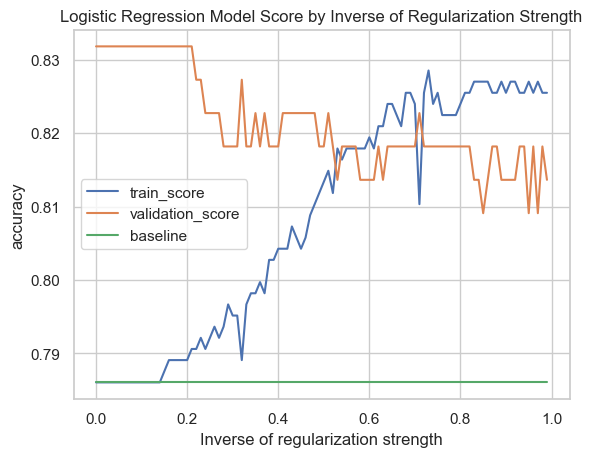

In [36]:
logic_df[logic_df.columns[:-3]].set_index("strength").plot()
plt.grid(visible=True)
plt.xlabel("Inverse of regularization strength")
plt.ylabel("accuracy")
fig_title = plt.title("Logistic Regression Model Score by Inverse of Regularization Strength")
_utility.save_visuals(fig= plt.gcf() ,viz_name= fig_title.get_text().lower().replace(" ", "_"), folder_name= 5)
plt.show()

**Best Logistic Regression Model**

In [37]:
# zoom in the middle area where the absolute difference between training score and validation score are smmallest
zoom_in = logic_df[(logic_df.strength > 0.52) & (logic_df.strength < 0.59)]
res = zoom_in[zoom_in.score_diff == zoom_in.score_diff.min()]
res

,strength,train_score,validation_score,baseline,score_diff,train-baseline_diff,validate-baseline_diff
55,0.55001,0.817906,0.818182,0.786039,0.000276,0.031866,0.032142
56,0.56001,0.817906,0.818182,0.786039,0.000276,0.031866,0.032142
57,0.57001,0.817906,0.818182,0.786039,0.000276,0.031866,0.032142


In [38]:
res.train_score - res.baseline

55    0.031866
56    0.031866
57    0.031866
dtype: float64

* Strength= 0.56001 looks to be the best performing logistic regression model
* Model accuracy is 0.031866 better than baseline

## 5. Support Vector Ma hine (SVM)

In [39]:
# c is cost or penalty for miss classifing points

result_array = []
for cost in np.arange(0.1,3,0.1):
    # create a svm object
    # SVC = support vector classifier
    svmclf = svm.SVC(C=cost,kernel="linear", gamma="auto", decision_function_shape= "ovr")
    # fit the data to the svm obbject
    # only fit the model on the training dataset
    svmclf.fit(xtrain, ytrain)
    # use the knn obkect to train the data and get the training score
    train_score = svmclf.score(xtrain, ytrain)
    val_score = svmclf.score(xval, yval)
    
    result = {
        "penalty": cost,
        "train_score": train_score,
        "validation_score": val_score,
        "baseline": baseline_acc,
        "score_diff": abs(train_score - val_score),
        "train-baseline_diff": train_score - baseline_acc,
        "validate-baseline_diff": val_score - baseline_acc
    }
    result_array.append(result)
svm_df = pd.DataFrame(result_array)
svm_df.head()

,penalty,train_score,validation_score,baseline,score_diff,train-baseline_diff,validate-baseline_diff
0,0.1,0.786039,0.831818,0.786039,0.045779,0.000000,0.045779
1,0.2,0.793627,0.827273,0.786039,0.033646,0.007587,0.041233
2,0.3,0.814871,0.818182,0.786039,0.003311,0.028832,0.032142
3,0.4,0.828528,0.822727,0.786039,0.005801,0.042489,0.036688
4,0.5,0.827011,0.818182,0.786039,0.008829,0.040971,0.032142


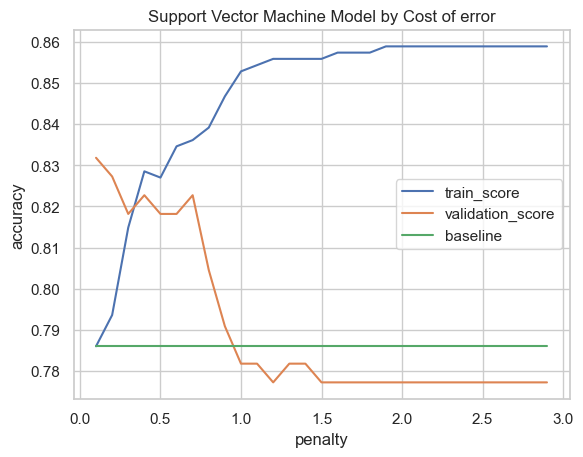

In [40]:
svm_df[svm_df.columns[:-3]].set_index("penalty").plot()
plt.grid(visible=True)
plt.xlabel("penalty")
plt.ylabel("accuracy")
fig_title = plt.title("Support Vector Machine Model by Cost of error")
_utility.save_visuals(fig= plt.gcf() ,viz_name= fig_title.get_text().lower().replace(" ", "_"), folder_name= 5)
plt.show()

**Best SVM model**

In [41]:
# zoom in the middle area where the absolute difference between training score and validation score are smallest
res = svm_df[svm_df.score_diff == svm_df.score_diff.min()]
res

,penalty,train_score,validation_score,baseline,score_diff,train-baseline_diff,validate-baseline_diff
2,0.3,0.814871,0.818182,0.786039,0.003311,0.028832,0.032142


In [42]:
res.train_score - res.baseline

2    0.028832
dtype: float64

* cost at 0.3 looks to be the best performing svm model
* Model accuracy is 0.028832 better than baseline

## Test Best Model (KNN)

Why I am testing on KNN
- I trust KNN as the best model beacuse the traing and validation results are first higher thatn most of the other models, but also beacuse the absolute value of the results are al always close to each other.

In [43]:
# Test  
result_array = []
knn = KNeighborsClassifier(n_neighbors=6, weights="uniform", p=2)
knn.fit(xtrain, ytrain)
train_score = knn.score(xtrain, ytrain)
val_score = knn.score(xval, yval)
test_score = knn.score(xtest, ytest)

# predict train
ypred = knn.predict(xtrain)

result = {
    "k":6,
    "baseline": baseline_acc,
    "train_score": train_score,
    "validation_score": val_score,
    "test_score":test_score,
    "test_base_diff": test_score - baseline_acc
}
result_array.append(result)
knn_test_df = pd.DataFrame(result_array)
knn_test_df

,k,baseline,train_score,validation_score,test_score,test_base_diff
0,6,0.786039,0.817906,0.818182,0.804545,0.018506


### Recommendation

**The test not much better than the baseline with only 1.8% greater than the base line acuracy. Knowing the involvement and importance of this KEV project and the impact on Federal Civilian Executive Branchs, I would not recomend any changes to there curent policies on known exploited vulnerability infostracture.**

**Below is the confusion metrix and classification report that shows in details the performance of the KNN model.**

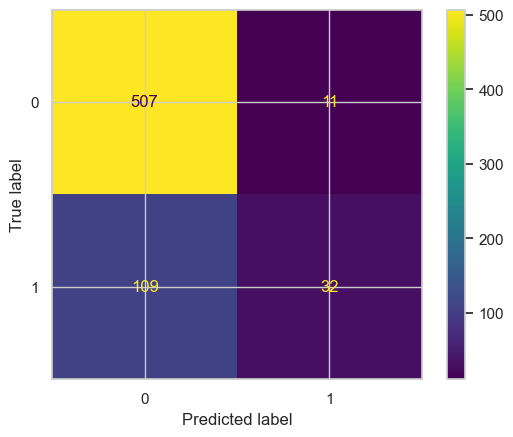

In [44]:
ConfusionMatrixDisplay.from_estimator(knn, xtrain, ytrain)

In [45]:
print(classification_report(ytrain, ypred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89       518
           1       0.74      0.23      0.35       141

    accuracy                           0.82       659
   macro avg       0.78      0.60      0.62       659
weighted avg       0.81      0.82      0.78       659

